Name: Harshith Akkapelli

Task-1: CRISP-DM

Dataset Link: [Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

**Step 1: Business Understanding**

Objective:

    The primary objective is to understand the factors that are highly correlated with passenger satisfaction.
    The secondary objective is to build a predictive model that can predict whether a passenger is satisfied or dissatisfied based on various factors.

Requirements:

    Identify and analyze the features that are most correlated with passenger satisfaction.
    Build a model that can predict passenger satisfaction with reasonable accuracy.
    Due to limited computational resources, ensure that the data processing and modeling steps are efficient.
    Save models, images, plots, and tables for later use and make them downloadable.

Understanding:
Given the objective and requirements, we need to first explore the dataset to understand its features and then identify any patterns or correlations. Once we have a good grasp of the data, we'll proceed to clean and preprocess it in preparation for modeling. We'll then select appropriate modeling techniques, train the models, and evaluate their performance.

Let's now move on to the next step: Data Understanding.

**Step 2: Data Understanding**

In this step, we will:

    Load the dataset.
    Get an overview of the dataset structure (number of rows, columns, data types).
    Examine the first few rows to get a feel for the data.
    Check for any missing values.
    Perform a basic statistical summary of the numerical columns.
    Visualize some of the key columns to gain insights.

Let's start by loading the dataset and getting an overview of its structure.

**PYCARET SETUP**

In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 94.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 56.7 MB/s eta

In [ ]:
"""Mount Google Drive to access your data"""
from google.colab import drive #Import library
drive.mount('/content/drive') #Mount it

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""IMPORT DATA AND HANDLE MISSING VALUES"""
import pandas as pd #Import Library

"""Function to load and remove na valued rows"""
def importData(url):
  print("Started Reading Data")
  getData = pd.read_csv(url)
  print("Completed Reading Data")
  print(getData.head())
  print("Removing na values")
  getData = getData.dropna()
  print("Removed rows with na values")
  return getData

url = '/content/drive/MyDrive/1a.csv'
inputData = importData(url) #Call the Function

Started Reading Data
Completed Reading Data
   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ... 

In [ ]:
from pycaret.classification import *

"""Function to set up the environment"""
def doSetUpOfPycaret(inputData,targetColumn):
  print("Setting up the environment")
  s = setup(inputData, target = targetColumn,normalize = True,normalize_method="zscore") #Normalization of data is important
  print("Environment is set up")
  return s

targetColumn = "satisfaction" #Target Column name
s = doSetUpOfPycaret(inputData,targetColumn)#Call the Function

Setting up the environment


,Description,Value
0,Session id,610
1,Target,satisfaction
2,Target type,Binary
3,Target mapping,"neutral or dissatisfied: 0, satisfied: 1"
4,Original data shape,"(103594, 25)"
5,Transformed data shape,"(103594, 27)"
6,Transformed train set shape,"(72515, 27)"
7,Transformed test set shape,"(31079, 27)"
8,Ordinal features,3
9,Numeric features,20


Environment is set up


**GENERAL WAY WITHOUT PYCARET**

In [ ]:
url = '/content/drive/MyDrive/1a.csv'
import pandas as pd

# Load the dataset
df = pd.read_csv(url)

# Overview of the dataset structure
overview = {
    "Number of rows": df.shape[0],
    "Number of columns": df.shape[1],
    "Column names": df.columns.tolist(),
    "Data types": df.dtypes.tolist()
}

overview


{'Number of rows': 103904,
 'Number of columns': 25,
 'Column names': ['Unnamed: 0',
  'id',
  'Gender',
  'Customer Type',
  'Age',
  'Type of Travel',
  'Class',
  'Flight Distance',
  'Inflight wifi service',
  'Departure/Arrival time convenient',
  'Ease of Online booking',
  'Gate location',
  'Food and drink',
  'Online boarding',
  'Seat comfort',
  'Inflight entertainment',
  'On-board service',
  'Leg room service',
  'Baggage handling',
  'Checkin service',
  'Inflight service',
  'Cleanliness',
  'Departure Delay in Minutes',
  'Arrival Delay in Minutes',
  'satisfaction'],
 'Data types': [dtype('int64'),
  dtype('int64'),
  dtype('O'),
  dtype('O'),
  dtype('int64'),
  dtype('O'),
  dtype('O'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64

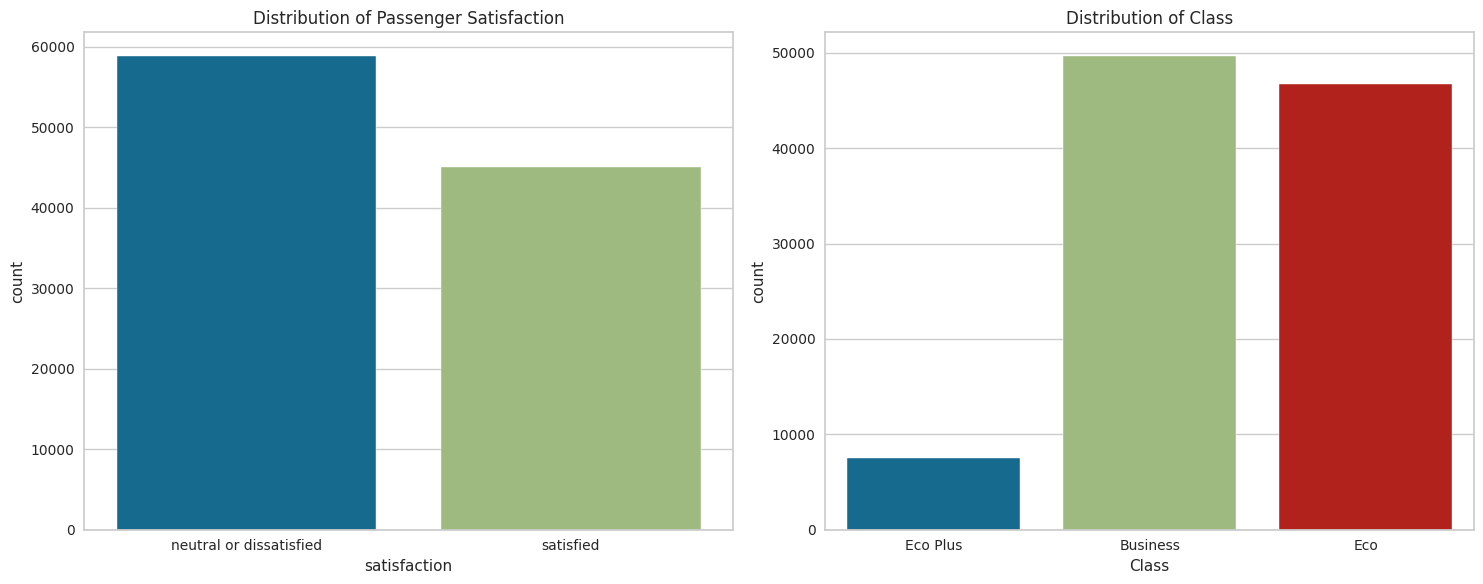

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Initialize a figure
plt.figure(figsize=(15, 6))

# Plot distribution of the target variable "satisfaction"
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='satisfaction')
plt.title('Distribution of Passenger Satisfaction')

# Plot distribution of the "Class" variable
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Class')
plt.title('Distribution of Class')

# Display the plots
plt.tight_layout()
plt.show()


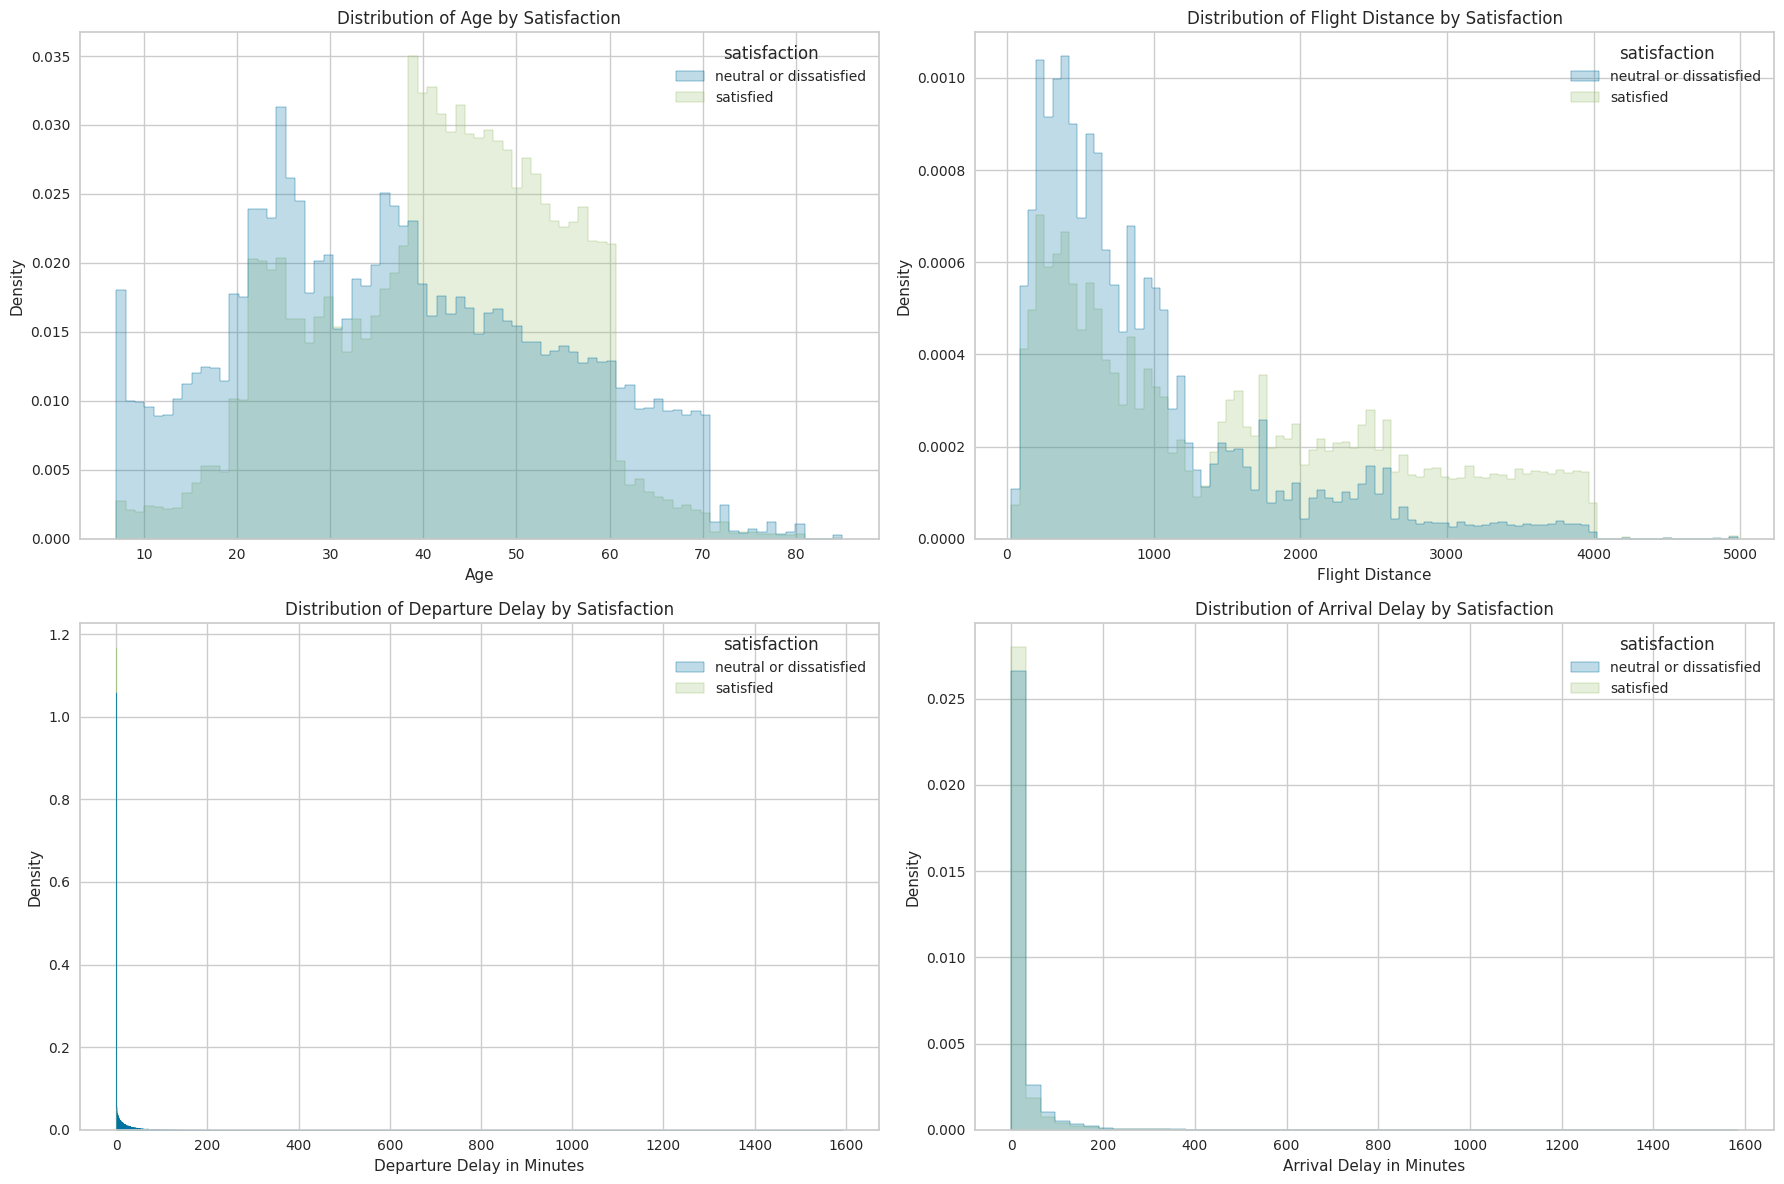

In [ ]:
# Initialize a figure
plt.figure(figsize=(18, 12))

# Plot distribution of Age with respect to satisfaction
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Age', hue='satisfaction', element='step', stat='density', common_norm=False)
plt.title('Distribution of Age by Satisfaction')

# Plot distribution of Flight Distance with respect to satisfaction
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='Flight Distance', hue='satisfaction', element='step', stat='density', common_norm=False)
plt.title('Distribution of Flight Distance by Satisfaction')

# Plot distribution of Departure Delay in Minutes with respect to satisfaction
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Departure Delay in Minutes', hue='satisfaction', element='step', stat='density', common_norm=False)
plt.title('Distribution of Departure Delay by Satisfaction')

# Plot distribution of Arrival Delay in Minutes with respect to satisfaction
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='Arrival Delay in Minutes', hue='satisfaction', bins=50, element='step', stat='density', common_norm=False)
plt.title('Distribution of Arrival Delay by Satisfaction')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


**Step 3: Data Preparation**

In this step, we'll perform the following tasks:

    Data Cleaning:
        Handle missing values.
        Remove unnecessary columns.
    Feature Engineering:
        Transform categorical variables into numerical format using encoding techniques.
        Consider creating new features, if necessary.
    Data Splitting:
        Split the dataset into training and testing sets to evaluate our model's performance.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Reload the dataset
df = pd.read_csv(url)

# Data Cleaning
# Impute missing values in "Arrival Delay in Minutes" with its median
median_value = df['Arrival Delay in Minutes'].median()
df['Arrival Delay in Minutes'].fillna(median_value, inplace=True)

# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

# Feature Engineering

# 1. Encoding Categorical Variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], drop_first=True)

# 2. Scaling Numerical Variables
numerical_features = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# 3. Data Splitting
X = df_encoded.drop('satisfaction_satisfied', axis=1)
y = df_encoded['satisfaction_satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((83123, 23), (20781, 23), (83123,), (20781,))

**Step-4: Modeling.**

In the modeling step, we'll:

    Choose a suitable algorithm.
    Train the model on the training data.
    Evaluate the model's performance on the test data.

n the Modeling step, we'll train and evaluate multiple machine learning models to predict passenger satisfaction.

For each model:

    We'll train it using the training data.
    Evaluate its performance on the test data using accuracy as a metric.

Starting Training of models


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9639,0.9953,0.9446,0.9713,0.9577,0.9262,0.9265,19.0990
lightgbm,Light Gradient Boosting Machine,0.9638,0.9950,0.9411,0.9745,0.9575,0.9260,0.9264,5.2560
xgboost,Extreme Gradient Boosting,0.9622,0.9949,0.9427,0.9693,0.9558,0.9228,0.9231,9.4660
rf,Random Forest Classifier,0.9619,0.9936,0.9381,0.9731,0.9553,0.9222,0.9226,8.4030
et,Extra Trees Classifier,0.9607,0.9932,0.9357,0.9726,0.9537,0.9196,0.9201,6.2870
dt,Decision Tree Classifier,0.9434,0.9427,0.9371,0.9328,0.9349,0.8849,0.8849,0.8960
gbc,Gradient Boosting Classifier,0.9433,0.9881,0.9212,0.9466,0.9337,0.8842,0.8845,13.6420
ada,Ada Boost Classifier,0.9281,0.9784,0.9126,0.9209,0.9167,0.8535,0.8536,3.4910
knn,K Neighbors Classifier,0.9226,0.9645,0.8724,0.9448,0.9071,0.8410,0.8430,4.6160
lr,Logistic Regression,0.8775,0.9285,0.8392,0.8732,0.8559,0.7495,0.7499,0.8150


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Completed Training of models
Printing Confusion Matrix of final model


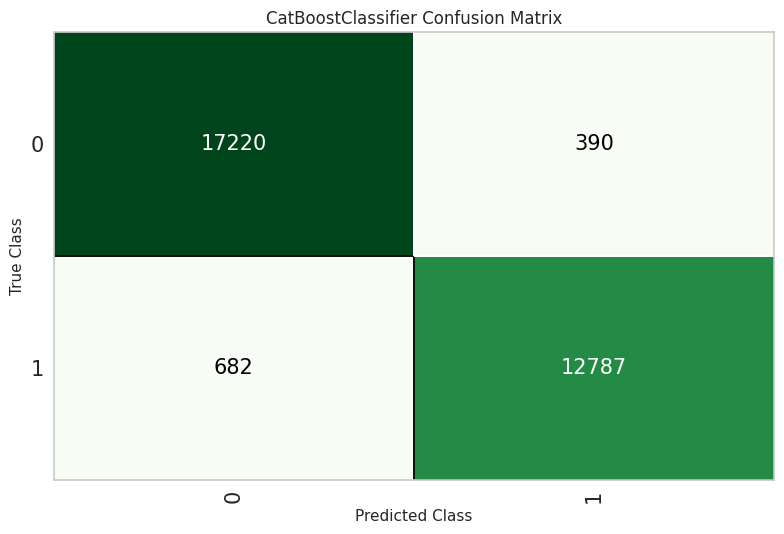

Printed Confusion Matric of final model
Plotting accuracy curves of final model


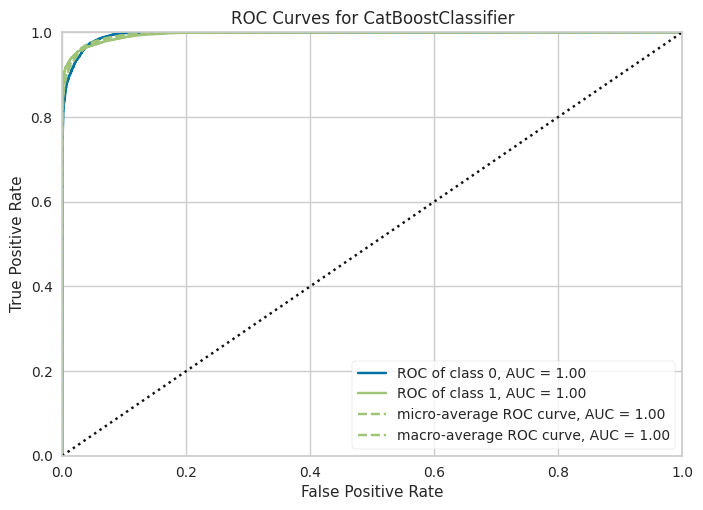

Plotte accuracy curves of final model
Feature Importance


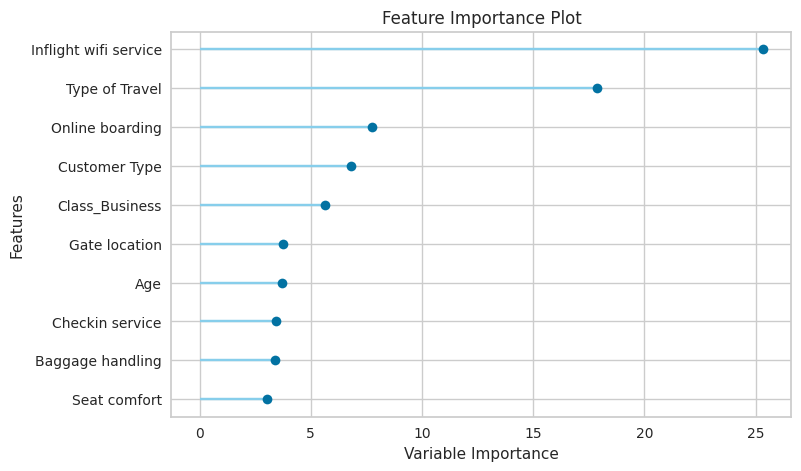

In [ ]:
"""Function to Train and Evaluate the models"""
def trainAndBenchmarkModels():
  #Training Phase
  print("Starting Training of models")
  finalModel = compare_models()
  print("Completed Training of models")

  #Confusion Matrix
  print("Printing Confusion Matrix of final model")
  plot_model(finalModel, plot = 'confusion_matrix')
  print("Printed Confusion Matric of final model")

  #Accuracy Curves
  print("Plotting accuracy curves of final model")
  plot_model(finalModel, plot = 'auc')
  print("Plotte accuracy curves of final model")

  #Feature Importance
  print("Feature Importance")
  plot_model(finalModel,plot='feature')

  #Return model
  return finalModel
finalModel = trainAndBenchmarkModels()


**Step 5: Evaluation**

In the evaluation step, we'll delve deeper into the performance metrics of the models to gain a more comprehensive understanding of their performance. While accuracy is a useful metric, it doesn't provide a full picture, especially when the dataset might be imbalanced.

We'll focus on the following metrics for a more detailed evaluation:

    Confusion Matrix: This will give us a breakdown of true positives, true negatives, false positives, and false negatives.
    Precision, Recall, and F1-score: These metrics provide a balance between false positives and false negatives.
    ROC Curve and AUC: The ROC curve plots the true positive rate against the false positive rate, and the AUC (Area Under the Curve) gives a single number summary of the ROC curve.

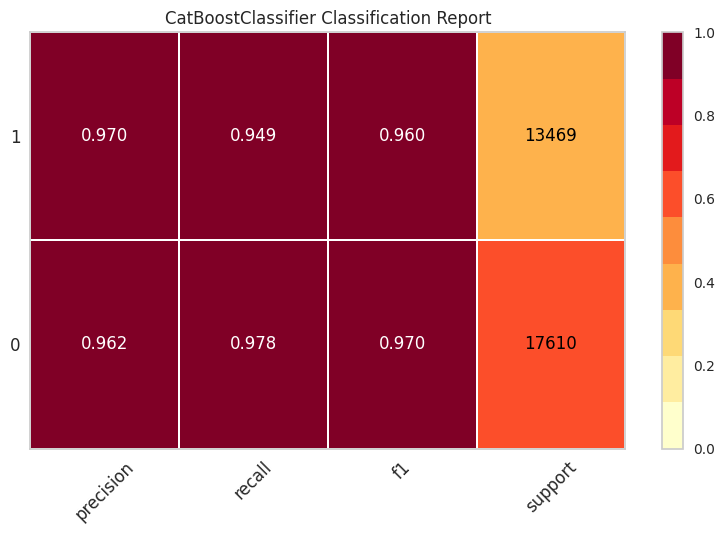

In [ ]:
"""Function to generate class report for final model"""
def classReport(finalModel,typeOfPlot):
  plot_model(finalModel, plot = typeOfPlot)
typeOfPlot = "class_report"
classReport(finalModel,typeOfPlot)

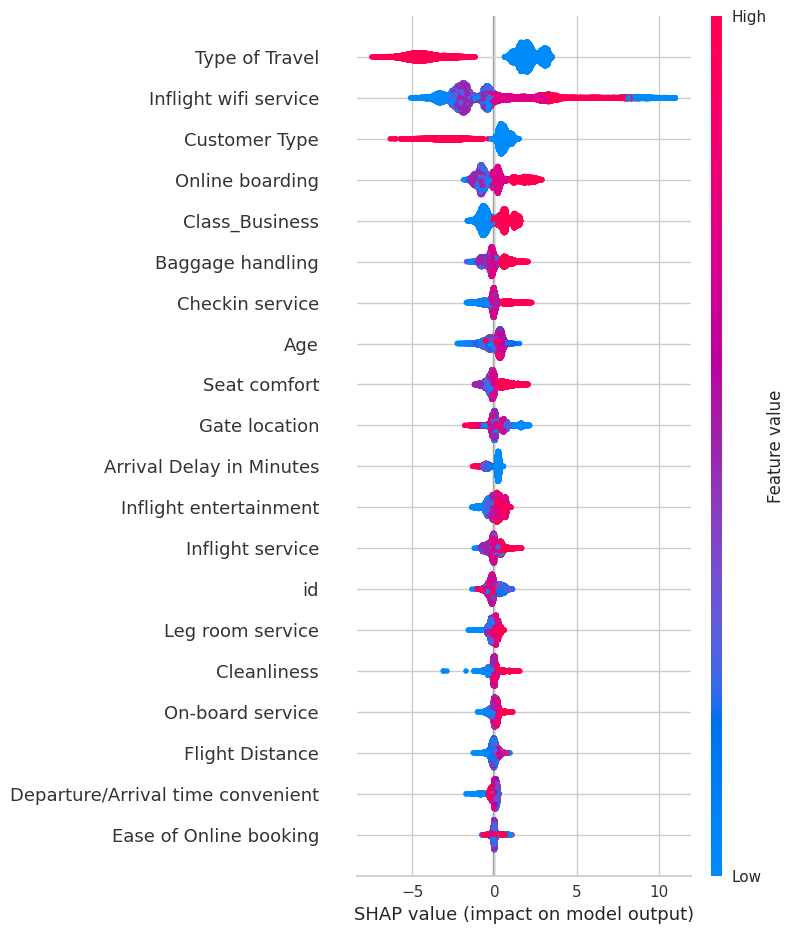

In [ ]:
"""Function to interpret summary interpretation"""
def interpretModel(finalModel,typeOfInterpret):
  interpret_model(finalModel, plot = typeOfInterpret)


typeOfInterpret = "summary"
interpretModel(finalModel,typeOfInterpret)
"""Reason for one example"""
interpret_model(finalModel, plot = 'reason', observation = 5)

**Step 6: Deployment**

In the deployment phase of the CRISP-DM process, we discuss strategies and mechanisms to deploy the machine learning model into a production or operational environment. Deploying a model means making it available for end-users or systems to make predictions on new, unseen data.

For the context of the airline passenger satisfaction survey, deployment could mean several things:
1. API Service Deployment:

a. Why API?
APIs (Application Programming Interfaces) allow for the integration of the model into different systems or platforms. By creating an API endpoint for our model, we can send data (in this case, passenger survey data) to the endpoint and receive predictions in return.

b. Tools & Platforms:

    Flask: A lightweight web framework in Python. It's commonly used to wrap machine learning models and serve them as APIs.
    FastAPI: A modern, fast web framework for building APIs with Python. It's based on standard Python type hints and is more performant than Flask.
    Docker: To containerize the API, ensuring that it runs consistently across different environments.
    Cloud Platforms: AWS (with services like Elastic Beanstalk), Azure, and Google Cloud offer platforms to host and scale these APIs.

2. Integration with Survey Systems:

If the airline has an existing digital system to collect passenger surveys, directly integrating the model can provide instant feedback or analytics on passenger satisfaction.

a. Direct Integration: This involves adding the model into the software system of the survey collection. Requires collaboration with software developers responsible for the survey system.

b. API Calls: If the model is deployed as an API, the survey system can make API calls to get predictions.
3. Batch Processing:

For airlines that prefer to analyze data in batches, scripts can be developed to process these batches.

a. Scheduled Analysis: Tools like Apache Airflow can be used to schedule and automate batch processing tasks.

b. Cloud Solutions: Cloud platforms offer solutions for batch processing. For instance, AWS Batch lets you run batch computing workloads on the AWS Cloud.
4. Feedback Loop:

Over time, we want to improve the model using new data.

a. Data Storage: Store predictions and actual outcomes in databases (like PostgreSQL, MySQL, or cloud databases).

b. Retraining Strategy: Periodically retrain the model using the new data. This can be automated using tools like Apache Airflow.
5. Visualization and Dashboards:

a. Tools: Tableau and Power BI are popular tools. For custom solutions, libraries like Dash by Plotly can be used.

b. Real-time Dashboards: Display real-time predictions, actual outcomes, and other relevant metrics.
Challenges and Considerations:

Model Drift: Monitor the model's predictions vs. actual outcomes. Tools like drift-detector can be used.

Scalability: Ensure that the deployment solution can handle the volume of data and requests. Load balancing (using tools like NGINX) and auto-scaling on cloud platforms can help.

Versioning: Use tools like MLflow or DVC for model versioning. This allows tracking different versions of the model and their performance.